In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
# Loads nicard and scope
manager.startModule('logic','cavitylogic')

0

# Initialize set up


* Amplifyer is fet -15V and = +85V 
* Calibrate strain gauge to zero with the kinesis software
* Pull fiber back
* Set nicard to -3.75

In [2]:
mynicard._write_cavity_ao(np.array([0.0],dtype=float), start=True)

1

* Move close with fiber

In [ ]:
first_resonances = cavitylogic.get_nth_full_sweep(sweep_number=1)

In [4]:
cavitylogic.ramp_popt = cavitylogic._fit_ramp(xdata=cavitylogic.time_trim[::10], ydata=cavitylogic.volts_trim[cavitylogic.ramp_channel,::10])
Modes = cavitylogic._ni.sweep_function(cavitylogic.RampUp_time[first_resonances],*cavitylogic.ramp_popt)

In [4]:
cavitylogic.linewidth_measurement(Modes,target_mode = 32, repeat=1, freq=40)

(4, 999952)
volts[ -4.44089210e-16]


0

did not find resonance
did not find resonance
(20, 999952)
volts[ -4.44089210e-16]
(20, 999952)
volts[ -4.44089210e-16]
(20, 999952)
volts[ -4.44089210e-16]
(20, 999952)
volts[ -4.44089210e-16]
(20, 999952)
volts[ -4.44089210e-16]


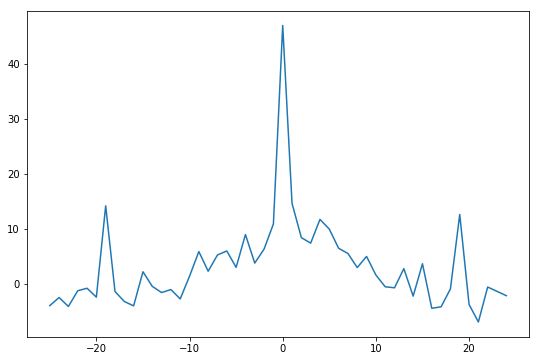

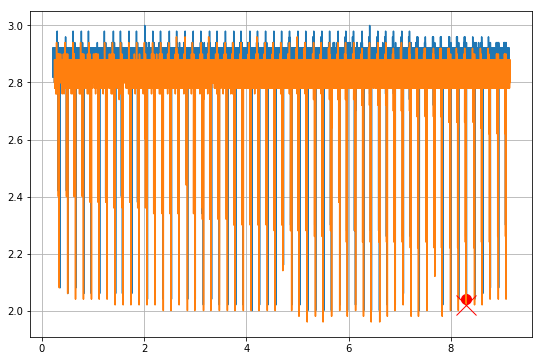

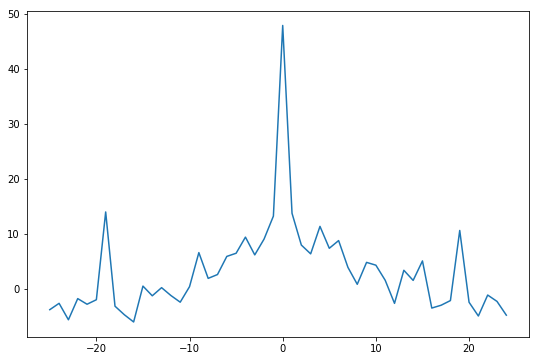

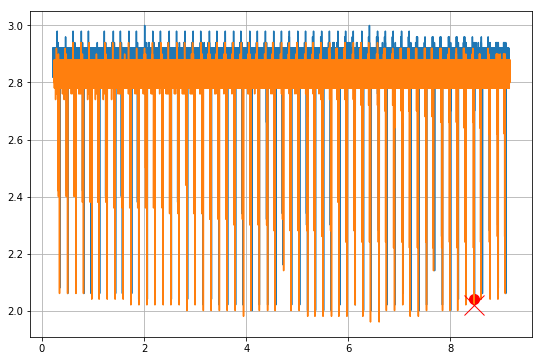

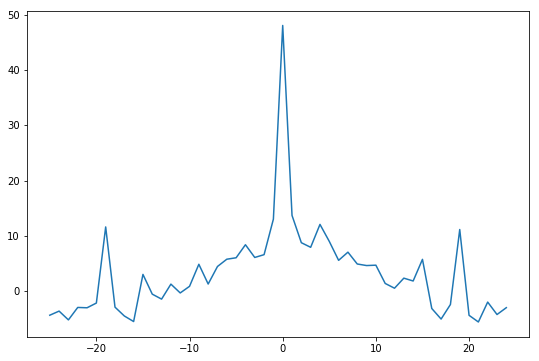

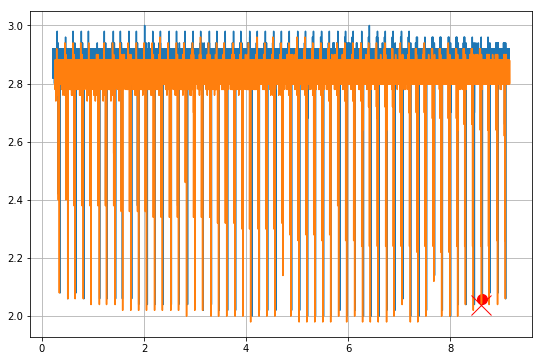

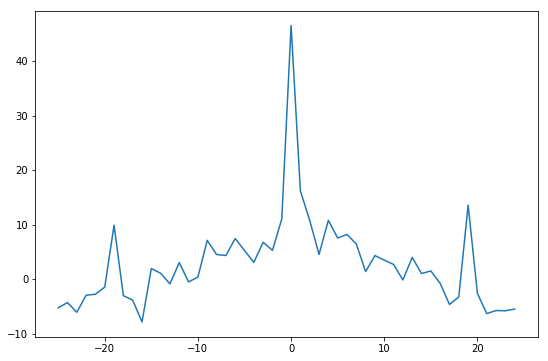

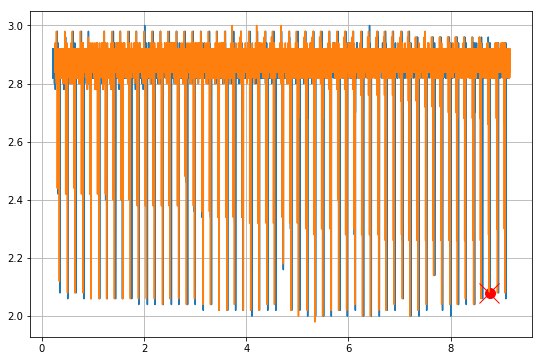

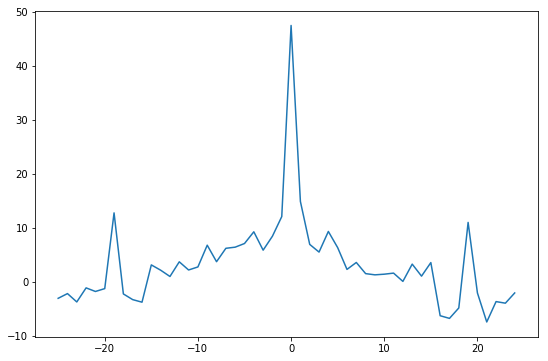

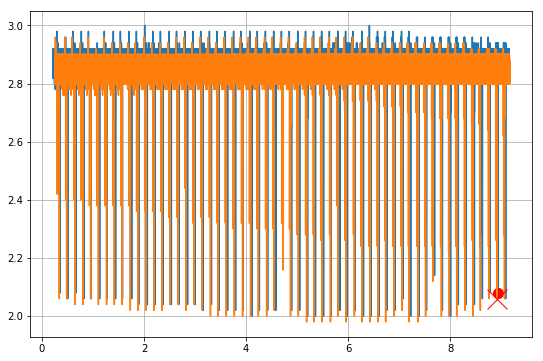

In [5]:
high_mode=50
low_mode=0
cavitylogic.current_mode_number=50
for i in range(5):
    cavitylogic.current_mode_number +=1
    corrected_resonances = cavitylogic.get_nth_full_sweep(sweep_number=2+i)
    target_mode = cavitylogic.get_target_mode(corrected_resonances, low_mode=low_mode, high_mode=high_mode, plot=True)
    cavitylogic.ramp_popt = cavitylogic._fit_ramp(xdata=cavitylogic.time_trim[::10], ydata=cavitylogic.volts_trim[cavitylogic.ramp_channel,::10])
    Modes = cavitylogic._ni.sweep_function(cavitylogic.RampUp_time[corrected_resonances],*cavitylogic.ramp_popt)
    cavitylogic.linewidth_measurement(Modes,target_mode = target_mode, repeat=5, freq=40)

In [ ]:
cavitylogic.mode_shift_list

In [ ]:
signal_a= cavitylogic.first_sweep[cavitylogic.first_corrected_resonances[0:55]]
signal_b= cavitylogic.RampUp_signalR[corrected_resonances[0:55]]

MODsignal_a = signal_a - signal_a.mean()
MODsignal_a = -MODsignal_a / MODsignal_a.std()
MODsignal_b = signal_b - signal_b.mean()
MODsignal_b = -MODsignal_b / MODsignal_b.std()


# Calculate cross correlation function https://en.wikipedia.org/wiki/Cross-correlation
xcorr = np.correlate(MODsignal_a, MODsignal_b, 'same')

nsamples = MODsignal_b.size
dt = np.arange(-nsamples / 2, nsamples / 2, dtype=int)
t_delay = dt[xcorr.argmax()]

In [ ]:
plt.plot(dt,xcorr)
plt.show()
plt.plot(MODsignal_a)
plt.plot(MODsignal_b)
print(t_delay)